In [20]:
# ==========================================
# 1️⃣ BLOK 1: IMPORT LIBRARY & SETUP FOLDER
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings

# Library Machine Learning & Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Konfigurasi
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# Membuat Struktur Folder Otomatis (Sesuai gaya teman Anda)
folders = ['data', 'models', 'images', 'src']
for folder in folders:
    path = f'/content/{folder}'
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"✅ Folder dibuat: {path}")
    else:
        print(f"📂 Folder sudah ada: {path}")

print("\n🚀 Setup Selesai! Siap memproses data Soybean.")

📂 Folder sudah ada: /content/data
📂 Folder sudah ada: /content/models
📂 Folder sudah ada: /content/images
📂 Folder sudah ada: /content/src

🚀 Setup Selesai! Siap memproses data Soybean.


In [21]:
# ==========================================
# 2️⃣ BLOK 2: LOAD DATA & CLEANING
# ==========================================

# 1. Definisi Nama Kolom (Karena dataset aslinya polosan)
col_names = [
    'class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
    'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth',
    'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
    'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging',
    'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay',
    'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit-spots',
    'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots'
]

# 2. Load Data
# Pastikan file soybean-large.data sudah ada di /content/
file_path = '/content/soybean-large.data'
df = pd.read_csv(file_path, names=col_names, header=None)

print(f"Dataset Awal: {df.shape}")

# 3. Handling Missing Values ('?')
# Ganti '?' jadi NaN lalu isi dengan Modus (nilai terbanyak)
df.replace('?', np.nan, inplace=True)
imputer = SimpleImputer(strategy='most_frequent')
df_clean = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("✅ Data Cleaning Selesai (Missing values diimputasi).")
df_clean.head()

Dataset Awal: (307, 36)
✅ Data Cleaning Selesai (Missing values diimputasi).


,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [22]:
# ==========================================
# 3️⃣ BLOK 3: PREPROCESSING & SPLITTING
# ==========================================

# Pisahkan Fitur (X) dan Target (y)
X = df_clean.drop('class', axis=1)
y = df_clean['class']

# Encode Fitur & Target
X_encoded = X.copy()
label_encoders = {}

# Loop untuk encode semua kolom fitur
for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# Encode Target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Khusus Deep Learning: Target perlu One-Hot Encoding
y_train_dl = to_categorical(y_train)
y_test_dl = to_categorical(y_test)

print(f"Data Train: {X_train.shape}")
print(f"Data Test : {X_test.shape}")
print("✅ Siap Masuk ke Modeling!")

Data Train: (245, 35)
Data Test : (62, 35)
✅ Siap Masuk ke Modeling!


In [23]:
# ==========================================
# 4️⃣ BLOK 4: TRAINING MODEL (3 PENDEKATAN)
# ==========================================

# --- MODEL 1: BASELINE (Decision Tree) ---
print("🌳 Training Model Baseline (Decision Tree)...")
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
acc_base = baseline_model.score(X_test, y_test)

# --- MODEL 2: ADVANCED ML (Random Forest) ---
print("🌲 Training Model ML (Random Forest)...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
acc_rf = rf_model.score(X_test, y_test)

# --- MODEL 3: DEEP LEARNING (Neural Network) ---
print("🧠 Training Model Deep Learning (MLP)...")
model_dl = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_train_dl.shape[1], activation='softmax') # Output Layer (19 Kelas)
])
model_dl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training diam-diam (verbose=0) agar log tidak kepanjangan
history = model_dl.fit(X_train, y_train_dl, epochs=50, batch_size=16, verbose=0, validation_data=(X_test, y_test_dl))
_, acc_dl = model_dl.evaluate(X_test, y_test_dl, verbose=0)

# Hasil Sementara
print(f"\n📊 HASIL SEMENTARA:")
print(f"   - Baseline (DT)    : {acc_base*100:.2f}%")
print(f"   - Advanced (RF)    : {acc_rf*100:.2f}%")
print(f"   - Deep Learning    : {acc_dl*100:.2f}%")

🌳 Training Model Baseline (Decision Tree)...
🌲 Training Model ML (Random Forest)...
🧠 Training Model Deep Learning (MLP)...

📊 HASIL SEMENTARA:
   - Baseline (DT)    : 90.32%
   - Advanced (RF)    : 91.94%
   - Deep Learning    : 88.71%


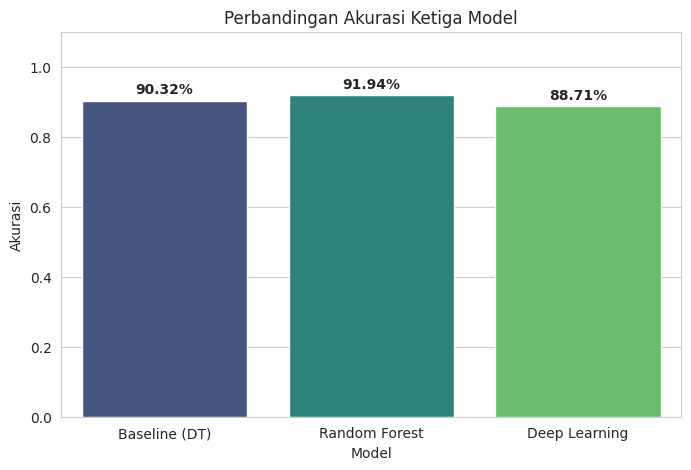

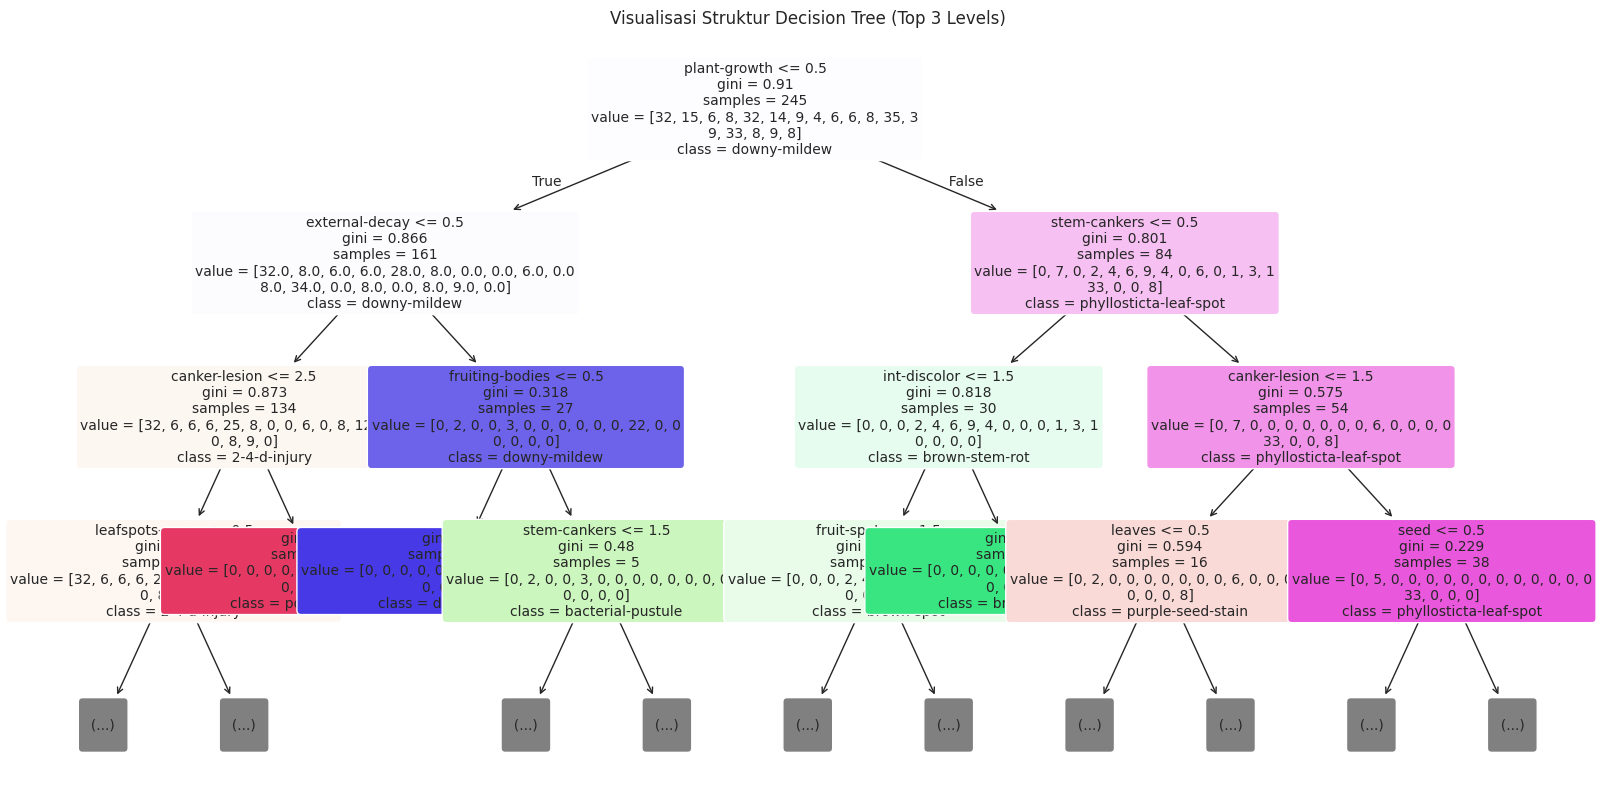

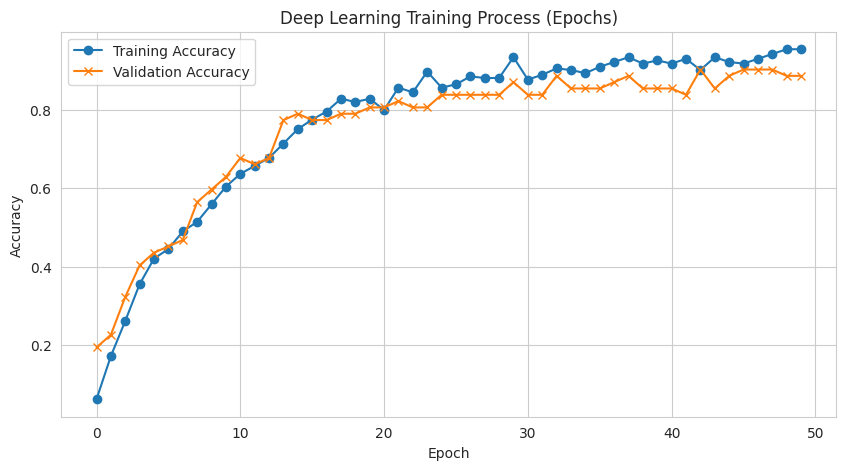

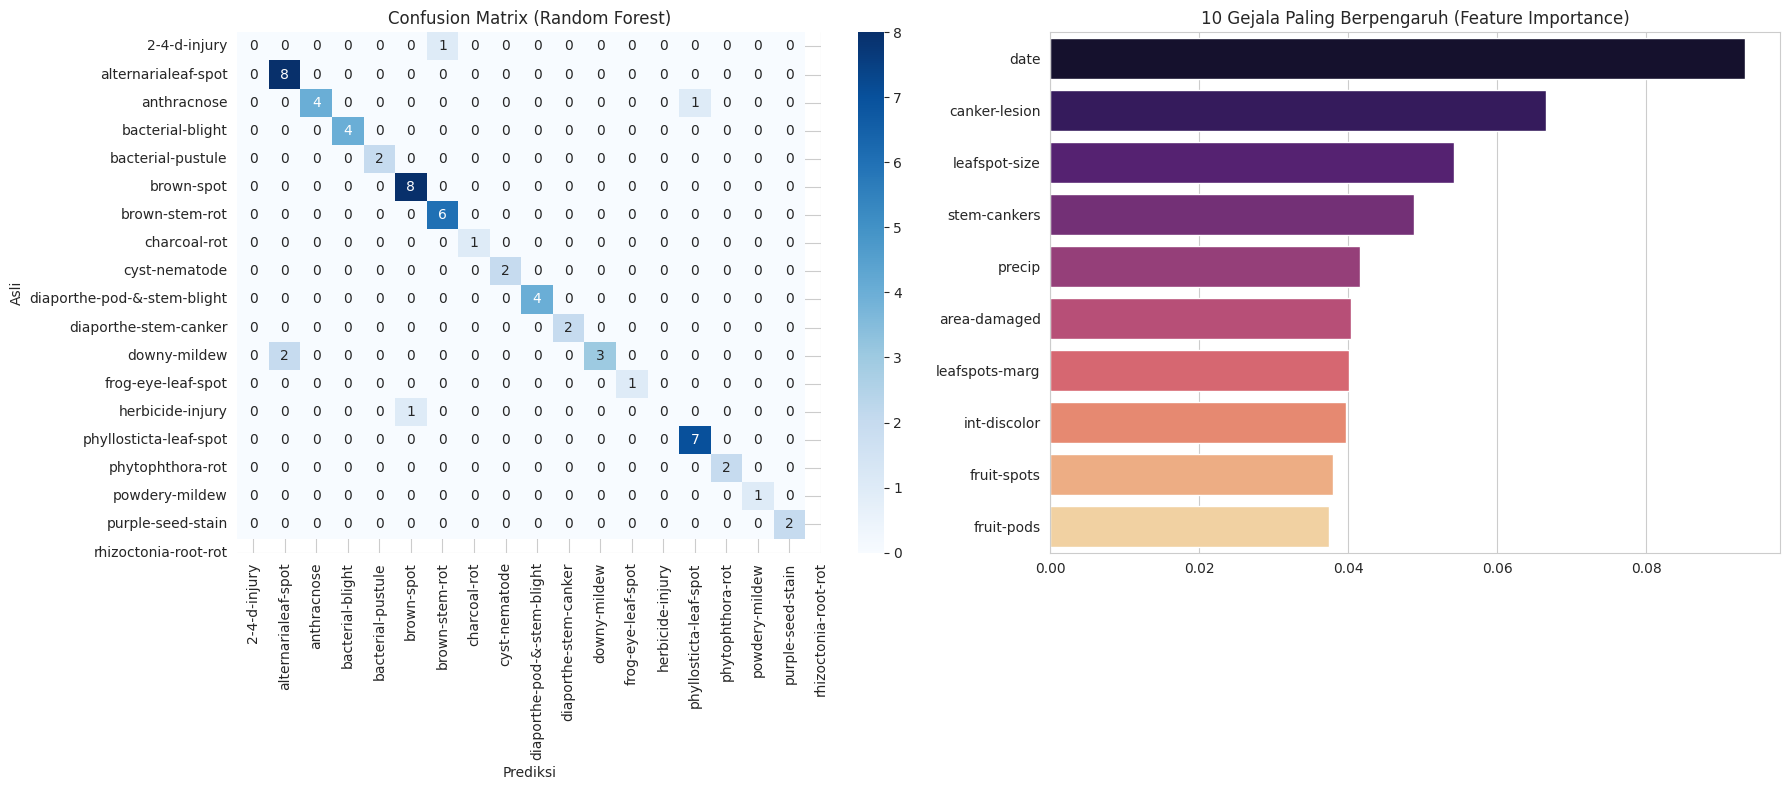

✅ 4 Gambar Visualisasi lengkap telah disimpan di folder '/content/images/'


In [24]:
# ==========================================
# 5️⃣ BLOK 5: EVALUASI & VISUALISASI LENGKAP
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# --- GAMBAR 1: KOMPARASI AKURASI (Mewakili 3 Model) ---
comparison = pd.DataFrame({
    'Model': ['Baseline (DT)', 'Random Forest', 'Deep Learning'],
    'Akurasi': [acc_base, acc_rf, acc_dl]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Akurasi', data=comparison, palette='viridis')
plt.ylim(0, 1.1)
plt.title('Perbandingan Akurasi Ketiga Model')
for i, v in enumerate(comparison['Akurasi']):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center', fontweight='bold')
plt.savefig('/content/images/1_accuracy_comparison.png')
plt.show()

# --- GAMBAR 2: VISUALISASI DECISION TREE (Khusus Baseline) ---
# Menampilkan logika "If-Else" dari model dasar
plt.figure(figsize=(20, 10))
plot_tree(baseline_model,
          feature_names=X.columns,
          class_names=list(le_target.classes_),
          filled=True,
          rounded=True,
          max_depth=3,  # Batasi kedalaman agar gambar terbaca
          fontsize=10)
plt.title("Visualisasi Struktur Decision Tree (Top 3 Levels)")
plt.savefig('/content/images/2_decision_tree_viz.png')
plt.show()

# --- GAMBAR 3: TRAINING HISTORY (Khusus Deep Learning) ---
# Menampilkan proses belajar (Epochs vs Accuracy)
# Catatan: Variabel 'history' diambil dari training blok 4
if 'history' in globals():
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
    plt.title('Deep Learning Training Process (Epochs)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig('/content/images/3_deep_learning_history.png')
    plt.show()

# --- GAMBAR 4: CONFUSION MATRIX & FEATURE IMPORTANCE (Khusus Random Forest) ---
# Kita ambil RF sebagai "Champion Model" untuk dibedah lebih dalam
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Subplot 1: Confusion Matrix
y_pred_rf = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_, ax=axes[0])
axes[0].set_title('Confusion Matrix (Random Forest)')
axes[0].set_xlabel('Prediksi')
axes[0].set_ylabel('Asli')
axes[0].tick_params(axis='x', rotation=90)

# Subplot 2: Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:10] # Top 10
sns.barplot(x=importances[indices], y=[X.columns[i] for i in indices], palette='magma', ax=axes[1])
axes[1].set_title('10 Gejala Paling Berpengaruh (Feature Importance)')

plt.tight_layout()
plt.savefig('/content/images/4_rf_detailed_analysis.png')
plt.show()

print("✅ 4 Gambar Visualisasi lengkap telah disimpan di folder '/content/images/'")

In [25]:
# ==========================================
# 6️⃣ BLOK 6: SIMPAN MODEL & DEMO PREDIKSI (FIXED)
# ==========================================

print("💾 Sedang menyimpan model ke folder '/content/models/'...")

# Simpan Model ML (Pickle)
joblib.dump(baseline_model, '/content/models/model_baseline.pkl')
joblib.dump(rf_model, '/content/models/model_rf.pkl')

# Simpan Model DL (H5/Keras)
# (Menggunakan format .keras untuk menghindari warning legacy HDF5)
model_dl.save('/content/models/model_dl.keras')

# PENTING: Simpan Encoders (Agar bisa dipakai di aplikasi/API nanti)
joblib.dump(le_target, '/content/models/le_target.pkl')
joblib.dump(label_encoders, '/content/models/le_features.pkl')

print("✅ Semua model berhasil disimpan!")

# --- DEMO PREDIKSI (Bonus Reproducibility) ---
print("\n🔍 --- DEMO PREDIKSI (Mencari Sampel Benar) ---")

# Konversi X_test ke numpy array dulu agar loop lebih cepat & aman
X_test_array = X_test.values

for i in range(len(X_test)):
    # Ambil data sampel (sekarang sudah aman karena array)
    sample = X_test_array[i].reshape(1, -1)
    true_label = y_test[i]

    # Prediksi
    pred_label = rf_model.predict(sample)[0]

    # Jika Benar, Tampilkan
    if pred_label == true_label:
        nama_asli = le_target.inverse_transform([true_label])[0]
        nama_pred = le_target.inverse_transform([pred_label])[0]

        print(f"Sampel Test Index ke-{i}:")
        print(f"  - Penyakit Asli  : {nama_asli}")
        print(f"  - Prediksi Model : {nama_pred}")
        print(f"  - Status         : ✅ BENAR")
        break

💾 Sedang menyimpan model ke folder '/content/models/'...
✅ Semua model berhasil disimpan!

🔍 --- DEMO PREDIKSI (Mencari Sampel Benar) ---
Sampel Test Index ke-1:
  - Penyakit Asli  : phytophthora-rot
  - Prediksi Model : phytophthora-rot
  - Status         : ✅ BENAR


In [27]:
# ==========================================
# 7️⃣ BLOK TAMBAHAN: MENGISI FOLDER SRC
# ==========================================
import os

# 1. Pastikan folder src ada
src_path = '/content/src'
if not os.path.exists(src_path):
    os.makedirs(src_path)

# 2. Isi script python (Versi .py dari Notebook Anda)
# Script ini berisi logika training Random Forest yang sudah dibersihkan
script_content = """
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train_soybean_model():
    print("🚀 Memulai proses training dari script Python...")

    # --- 1. SETUP PATH ---
    # Asumsi script dijalankan dari root project
    dataset_path = '/content/data/soybean-large.data'
    model_save_path = '/content/models/model_rf_script.pkl'

    # Cek dataset
    if not os.path.exists(dataset_path):
        print(f"❌ Error: Dataset tidak ditemukan di {dataset_path}")
        return

    # --- 2. LOAD DATA ---
    col_names = [
        'class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
        'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth',
        'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
        'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging',
        'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay',
        'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit-spots',
        'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots'
    ]

    print("📂 Loading dataset...")
    df = pd.read_csv(dataset_path, names=col_names, header=None)

    # --- 3. CLEANING ---
    df.replace('?', np.nan, inplace=True)
    imputer = SimpleImputer(strategy='most_frequent')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # --- 4. ENCODING ---
    X = df_imputed.drop('class', axis=1)
    y = df_imputed['class']

    X_encoded = X.copy()
    for col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y)

    # --- 5. SPLITTING ---
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

    # --- 6. TRAINING (Random Forest) ---
    print("🌲 Training Random Forest Model...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluasi Singkat
    acc = rf_model.score(X_test, y_test)
    print(f"✅ Training Selesai! Akurasi: {acc*100:.2f}%")

    # --- 7. SAVING ---
    if not os.path.exists('/content/models'):
        os.makedirs('/content/models')

    joblib.dump(rf_model, model_save_path)
    print(f"💾 Model berhasil disimpan ke: {model_save_path}")

if __name__ == "__main__":
    train_soybean_model()
"""

# 3. Tulis konten ke file soybean_training.py
file_name = 'soybean_training.py'
full_path = os.path.join(src_path, file_name)

with open(full_path, 'w') as f:
    f.write(script_content)

print(f"✅ Berhasil membuat file source code!")
print(f"📂 Lokasi: {full_path}")
print("👉 Silakan cek folder 'src' di panel kiri, file sudah tersedia.")

✅ Berhasil membuat file source code!
📂 Lokasi: /content/src/soybean_training.py
👉 Silakan cek folder 'src' di panel kiri, file sudah tersedia.
